## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

In [8]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [9]:
pip install webdriver_manager


  Obtaining dependency information for webdriver_manager from https://files.pythonhosted.org/packages/b1/51/b5c11cf739ac4eecde611794a0ec9df420d0239d51e73bc19eb44f02b48b/webdriver_manager-4.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import re
import pandas as pd

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [3]:
url = 'https://www.hufs.ac.kr/hufs/11403/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGaHVmcyUyRjIxODclMkYxNTMxNjclMkZhcnRjbFZpZXcuZG8lM0ZwYWdlJTNEMSUyNnNyY2hDb2x1bW4lM0QlMjZzcmNoV3JkJTNEJTI2YmJzQ2xTZXElM0QlMjZiYnNPcGVuV3JkU2VxJTNEJTI2cmdzQmduZGVTdHIlM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNnBhc3N3b3JkJTNEJTI2'
response = requests.get(url)
     

soup = BeautifulSoup(response.text, 'html.parser')

tags = soup.find_all('p')

txt_list = [txt.get_text() for txt in tags]
news = ' '.join(txt_list)
print(news)
     

우리대학 대학일자리플러스본부(본부장 이지연)는 지난 3월 11일(월), 제3기 진로취업지원센터 서포터즈 수료식을 개최하였다.    ‘진로취업지원센터 서포터즈’는 대학일자리플러스본부 진로취업지원센터의 다양한 사업과 프로그램을 홍보함으로써 센터 인지도를 개선하고 학생들의 진로취업 지원 프로그램 참여도를 높이기 위해 발족, 지난 2022년부터 3기째 운영 중이다.  3팀으로 구성된 이번 3기 서포터즈는 지난해 9월, 임명식과 OT를 시작으로 약 5개월간 ‘HUFS 글로벌 직무 박람회’, ‘HUFS 특강’, 다수 기관과의 업무 협약 등 오프라인 행사를 지원하는 것은 물론 카드 뉴스 제작과 블로그 운영을 통해 진로취업지원센터의 프로그램을 효과적으로 홍보하고 지원하는 등 서포터즈의 역할을 충실히 마쳤다. 특히, 인스타그램 릴스 및 영상을 제작하여 누적 조회 수 약 5만 7천 회를 달성하기도 하였다.  서포터즈 우수상을 받은 김세빈(경영 23) 학생은 “서포터즈로서 진로취업지원센터를 모든 외대생이 알 수 있도록 노력하겠다는 다짐이 오늘에 이르기까지 이어져 행복했다. 앞으로도 진로취업지원센터에 많은 관심을 보여주길 바란다”라고 활동 소감을 밝혔다. 박하은(말레이·인도네시아어 23) 학생은 “서포터즈로서 진로취업지원센터를 홍보하는 것을 넘어 진로취업과 관련된 행사와 정보들을 얻을 수 있어서 뿌듯한 시간이었다”라고 전했다.  이지연 서울캠퍼스 학생·인재개발처장은 “서포터즈 활동 경험이 성공적인 사회 일원이 되는데 기반이 될 수 있도록 다양한 활동의 기회를 제공하고자 한다”라며, “앞으로 선발될 제4기 서포터즈의 활동을 지원하여, 진로취업지원센터 인지도 향상과 대학일자리플러스센터 사업의 정책 체감도 제고를 위한 노력을 지속적으로 기울일 것”이라는 계획을 밝혔다. 1191 
			  Copyright ⓒ Hankuk University of Foreign Studies. All Rights Reserved.
			


1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eun01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
news1 = re.sub(r'[^\w\s]', '', news)
news2 = re.sub(r'\d+', '', news1)


tokens = word_tokenize(news2)
freq_dist = FreqDist(tokens)

for word, freq in freq_dist.items():
  print(f'{word}: {freq}')

우리대학: 1
대학일자리플러스본부본부장: 1
이지연는: 1
지난: 2
월: 2
일월: 1
제기: 2
진로취업지원센터: 3
서포터즈: 3
수료식을: 1
개최하였다: 1
서포터즈는: 2
대학일자리플러스본부: 1
진로취업지원센터의: 2
다양한: 2
사업과: 1
프로그램을: 2
홍보함으로써: 1
센터: 1
인지도를: 1
개선하고: 1
학생들의: 1
진로취업: 1
지원: 1
프로그램: 1
참여도를: 1
높이기: 1
위해: 1
발족: 1
년부터: 1
기째: 1
운영: 1
중이다: 1
팀으로: 1
구성된: 1
이번: 1
기: 1
지난해: 1
임명식과: 1
OT를: 1
시작으로: 1
약: 2
개월간: 1
HUFS: 2
글로벌: 1
직무: 1
박람회: 1
특강: 1
다수: 1
기관과의: 1
업무: 1
협약: 1
등: 2
오프라인: 1
행사를: 1
지원하는: 2
것은: 1
물론: 1
카드: 1
뉴스: 1
제작과: 1
블로그: 1
운영을: 1
통해: 1
효과적으로: 1
홍보하고: 1
서포터즈의: 2
역할을: 1
충실히: 1
마쳤다: 1
특히: 1
인스타그램: 1
릴스: 1
및: 1
영상을: 1
제작하여: 1
누적: 1
조회: 1
수: 4
만: 1
천: 1
회를: 1
달성하기도: 1
하였다: 1
우수상을: 1
받은: 1
김세빈경영: 1
학생은: 2
서포터즈로서: 2
진로취업지원센터를: 2
모든: 1
외대생이: 1
알: 1
있도록: 2
노력하겠다는: 1
다짐이: 1
오늘에: 1
이르기까지: 1
이어져: 1
행복했다: 1
앞으로도: 1
진로취업지원센터에: 1
많은: 1
관심을: 1
보여주길: 1
바란다라고: 1
활동: 2
소감을: 1
밝혔다: 2
박하은말레이인도네시아어: 1
홍보하는: 1
것을: 1
넘어: 1
진로취업과: 1
관련된: 1
행사와: 1
정보들을: 1
얻을: 1
있어서: 1
뿌듯한: 1
시간이었다라고: 1
전했다: 1
이지연: 1
서울캠퍼스: 1
학생인재개발처장은: 1
경험이: 1
성공적인: 1
사회: 1
일원이: 1
되는데: 1
기반이: 1
될: 1
활동의: 1
기회를:

In [6]:
df = pd.DataFrame(freq_dist.items(), columns=['토큰', '빈도수'])
print(df)

                토큰  빈도수
0             우리대학    1
1    대학일자리플러스본부본부장    1
2             이지연는    1
3               지난    2
4                월    2
..             ...  ...
157        Foreign    1
158        Studies    1
159            All    1
160         Rights    1
161       Reserved    1

[162 rows x 2 columns]


1.3 불용어를 제거하시오.

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eun01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = "는 의 다양한 과 을 함으로써 하고 중이다 으로 된 으로 간 등 통해 하는 마쳤다 하기도 하였다 은 로서 도록 다는 이 까지 에 길 다 라고 한 데 하여 이라는"
filtered_tokens = [token for token in tokens if token not in stop_words]

filtered_freq_dist = FreqDist(filtered_tokens)
df1 = pd.DataFrame(filtered_freq_dist.items(), columns=['토큰', '빈도수'])
print(df1)

                토큰  빈도수
0             우리대학    1
1    대학일자리플러스본부본부장    1
2             이지연는    1
3               지난    2
4                월    2
..             ...  ...
150        Foreign    1
151        Studies    1
152            All    1
153         Rights    1
154       Reserved    1

[155 rows x 2 columns]


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [9]:
pip install wordcloud

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
wc = df1.set_index("토큰").to_dict()["빈도수"]

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word = WordCloud(
font_path = 'malgun',
width= 400,
height = 400,
max_font_size = 100,
background_color = 'white'
).generate_from_frequencies(wc)

(-0.5, 399.5, 399.5, -0.5)

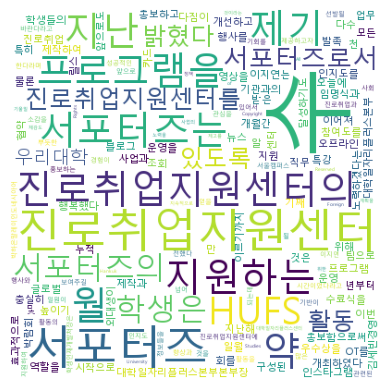

In [23]:
plt.figure()
plt.imshow(word)
plt.axis('off')

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [2]:
pip install google_play_scraper

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
from google_play_scraper import app

text = app(
    'com.nhn.android.nmap',
    lang='ko',
    country='kr'
)

In [4]:
from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.nhn.android.nmap',
    sleep_milliseconds=0, 
    lang='ko', 
    country='kr', 
)


print(result)

[{'reviewId': '744a9514-e743-4eba-b0d9-bbb8d7561c92', 'userName': 'Minho Chang', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLC3l6GwBDRssep2-k_13rK2KfA_pylKwc7Is6e0qbD=mo', 'content': '위성지도도 미리다운받아 사용할수 있게 해주세요', 'score': 3, 'thumbsUpCount': 0, 'reviewCreatedVersion': '5.25.13.1', 'at': datetime.datetime(2024, 3, 17, 21, 10, 1), 'replyContent': '안녕하세요. 네이버 지도 서비스입니다.\n서비스에 대한 소중한 의견 감사드립니다.\n고객님께서 보내주신 의견은 추후 서비스 개선 시 참고하도록 하겠습니다.\n다만, 서비스에 실제 적용까지는 시간이 필요한 점 양해 부탁드립니다.\n네이버 지도 서비스를 이용해주셔서 감사드리며, 더 나은 서비스를 제공하도록 노력하겠습니다.', 'repliedAt': datetime.datetime(2024, 3, 18, 15, 24, 44), 'appVersion': '5.25.13.1'}, {'reviewId': '6492d15f-157f-48ff-a413-952a9c6afbc2', 'userName': '유민', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLa5dlu2WpY87F9nsqX9AoSCVGGpe742cGAjLczXmO33A=mo', 'content': '검색을 해서 가는데 건물을 가로질러 가라네요...', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '5.25.13.1', 'at': datetime.datetime(2024, 3, 17, 16, 43, 47), 'replyContent': "안녕하세요. 네이버 

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [5]:
df = pd.DataFrame(result)
df1 = df[['at', 'content', 'score']]
print(df1)

df1.head(10)

                     at                                            content  \
0   2024-03-17 21:10:01                          위성지도도 미리다운받아 사용할수 있게 해주세요   
1   2024-03-17 16:43:47                        검색을 해서 가는데 건물을 가로질러 가라네요...   
2   2024-03-17 15:04:31  네이버 지도 앱을 항상 잘 이용하는 유저입니다~. 특히 저같은 경우는 어떠한 목적지...   
3   2024-03-17 14:33:17  뭐니??? 너무~~~ 너무 불편하고~~~ 또 불편하고@@@ 너무 불편해서 못쓰겠네 ...   
4   2024-03-17 12:23:47  좋은 장소 찾기 너무 좋고 편리해서 늘 애용해요 그런데 요즘들어 저장해놓은 위치 별...   
..                  ...                                                ...   
791 2023-11-23 14:41:45  마이 플레이스 설정하는거 너무 잘쓰고 있는데 별표 색상 추가 해주시면 정말 더 잘 ...   
792 2023-11-23 13:08:30  길 찾아가는데 잘 사용하고 있습니다. 세종시 마을버스 52번의 경로가 실제와 다른 ...   
793 2023-11-23 10:08:58  네비게이션은 이거로 쓸게 못되네요.. ㅎㅎㅎㅎ 완전 막히는 길인데, 제일 빠르다고해...   
794 2023-11-23 00:27:11  이런 그지같은 지도 있을까. 내가 오디가고 이는지 확인되지 않는 지도가 있을까? 이...   
795 2023-11-22 23:43:18  잘 쓰고 있어요. 자전거 지도가 좀 더 개선되었으면 하는 바람입니다. 자전거지도는 ...   

     score  
0        3  
1        1  
2        5  
3        1 

,at,content,score
0,2024-03-17 21:10:01,위성지도도 미리다운받아 사용할수 있게 해주세요,3
1,2024-03-17 16:43:47,검색을 해서 가는데 건물을 가로질러 가라네요...,1
2,2024-03-17 15:04:31,네이버 지도 앱을 항상 잘 이용하는 유저입니다~. 특히 저같은 경우는 어떠한 목적지...,5
3,2024-03-17 14:33:17,뭐니??? 너무~~~ 너무 불편하고~~~ 또 불편하고@@@ 너무 불편해서 못쓰겠네 ...,1
4,2024-03-17 12:23:47,좋은 장소 찾기 너무 좋고 편리해서 늘 애용해요 그런데 요즘들어 저장해놓은 위치 별...,5
5,2024-03-17 10:59:04,갑자기이상해졌어요,1
6,2024-03-16 15:00:25,버스가 도착하지 않는 정류장으로 가라고 하네요,1
7,2024-03-16 12:19:23,최적의 경로가 있는데 그거는 모르고 최장의길이로 탐색함 개 뷰웅신같음 얘때문에 길 ...,1
8,2024-03-16 10:03:35,안드로이드 오토 갑자기 안됨.,2
9,2024-03-16 08:22:21,안드로이드 오토만 그런지 모르겟습니다. 구간단속 안내가 되지 않습니다. 단속안내는 ...,3


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [6]:
positive = df1[df1['score']==5]
negative = df1[df1['score']==1]

In [7]:
positive

,at,content,score
2,2024-03-17 15:04:31,네이버 지도 앱을 항상 잘 이용하는 유저입니다~. 특히 저같은 경우는 어떠한 목적지...,5
4,2024-03-17 12:23:47,좋은 장소 찾기 너무 좋고 편리해서 늘 애용해요 그런데 요즘들어 저장해놓은 위치 별...,5
11,2024-03-15 22:12:01,좋아요. ~,5
14,2024-03-15 17:00:10,서울,5
15,2024-03-15 16:30:38,깜짝놀랬어요 편리한 것들을 찾아내서 재밌네요,5
...,...,...,...
783,2023-11-24 05:47:54,좋아요,5
784,2023-11-24 01:53:50,편리하고 자세한 정보도 알려주며 네비기능도 있어요!,5
788,2023-11-23 18:45:33,편해요!,5
791,2023-11-23 14:41:45,마이 플레이스 설정하는거 너무 잘쓰고 있는데 별표 색상 추가 해주시면 정말 더 잘 ...,5


In [8]:
negative

,at,content,score
1,2024-03-17 16:43:47,검색을 해서 가는데 건물을 가로질러 가라네요...,1
3,2024-03-17 14:33:17,뭐니??? 너무~~~ 너무 불편하고~~~ 또 불편하고@@@ 너무 불편해서 못쓰겠네 ...,1
5,2024-03-17 10:59:04,갑자기이상해졌어요,1
6,2024-03-16 15:00:25,버스가 도착하지 않는 정류장으로 가라고 하네요,1
7,2024-03-16 12:19:23,최적의 경로가 있는데 그거는 모르고 최장의길이로 탐색함 개 뷰웅신같음 얘때문에 길 ...,1
...,...,...,...
779,2023-11-24 15:13:06,한번씩 길 이상하게 알려줘서 안 타도 될 고속도로 태워서 돈 내게 하고 왔던 길로 ...,1
780,2023-11-24 11:35:15,실시간 교통정보 반영하고 알려주는거냐? 똑바로 개발해라 진짜,1
785,2023-11-24 00:22:10,위치설정 권한 설정해서 받아갔으면 그 값어치좀 해냅시다 느그들 이익만 처 가져갈라하...,1
793,2023-11-23 10:08:58,"네비게이션은 이거로 쓸게 못되네요.. ㅎㅎㅎㅎ 완전 막히는 길인데, 제일 빠르다고해...",1


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [11]:
import matplotlib.pyplot as plt
df1['at'] = pd.to_datetime(df1['at'])

C:\Users\eun01\AppData\Local\Temp\ipykernel_15304\698340217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['at'] = pd.to_datetime(df1['at'])


C:\Users\eun01\AppData\Local\Temp\ipykernel_15304\2584952125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['at'].dt.to_period('M')


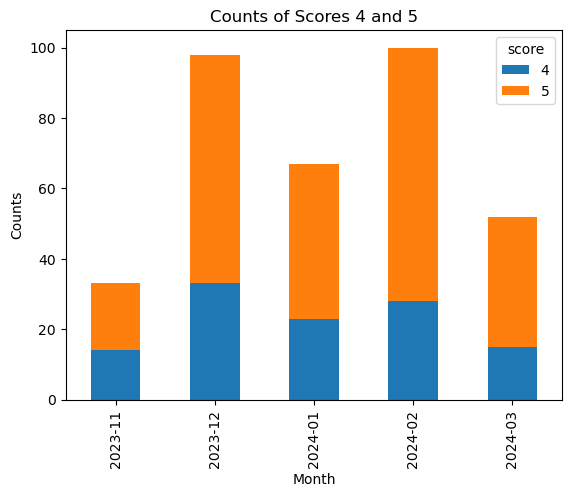

In [22]:
df2 = df1[df1['score'].isin([4, 5])]

df2['month'] = df2['at'].dt.to_period('M')
score_high = df2.groupby(['month', 'score']).size().unstack(fill_value=0)

score_high.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of Scores 4 and 5')
plt.show()

C:\Users\eun01\AppData\Local\Temp\ipykernel_15304\1413853364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = df3['at'].dt.to_period('M')


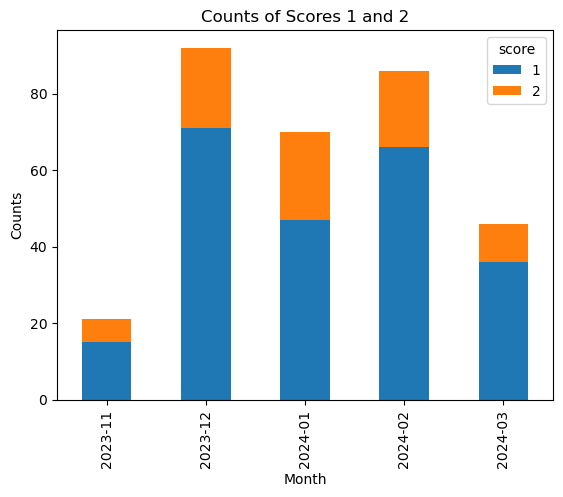

In [23]:
df3 = df1[df1['score'].isin([1, 2])]

df3['month'] = df3['at'].dt.to_period('M')
score_low = df3.groupby(['month', 'score']).size().unstack(fill_value=0)

score_low.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of Scores 1 and 2')
plt.show()

In [16]:
score_counts = df1['score'].value_counts().sort_index()
print(score_counts)

1    235
2     80
3    131
4    113
5    237
Name: score, dtype: int64
